In [1]:
import xgboost as xgb  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle                                                                    # Saving/loading GBM files


from xgboost import plot_importance
from matplotlib import colors

In [2]:
all_models1 = []
for file in range(1,6):
    file_name = f"CV_{1}_model_{file}.pkl"
    with open(file_name, "rb") as f:
        model = pickle.load(f)
        all_models1.append(model)
        
all_models2 = []
for file in range(1,6):
    file_name = f"CV_{2}_model_{file}.pkl"
    with open(file_name, "rb") as f:
        model = pickle.load(f)
        all_models2.append(model)
        
all_models3 = []
for file in range(1,6):
    file_name = f"CV_{3}_model_{file}.pkl"
    with open(file_name, "rb") as f:
        model = pickle.load(f)
        all_models3.append(model)
        
all_models4 = []
for file in range(1,6):
    file_name = f"CV_{4}_model_{file}.pkl"
    with open(file_name, "rb") as f:
        model = pickle.load(f)
        all_models4.append(model)
        
all_models5 = []
for file in range(1,6):
    file_name = f"CV_{5}_model_{file}.pkl"
    with open(file_name, "rb") as f:
        model = pickle.load(f)
        all_models5.append(model)
        
        

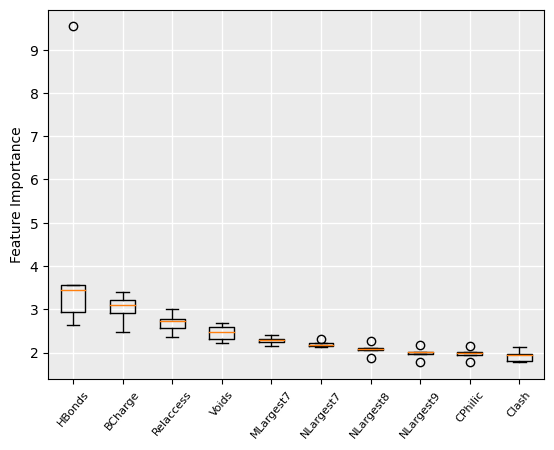

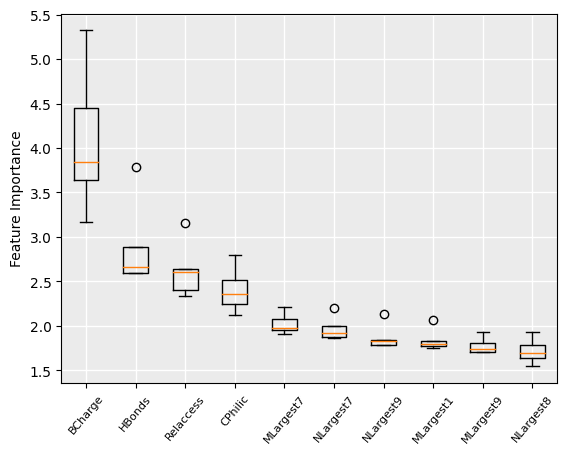

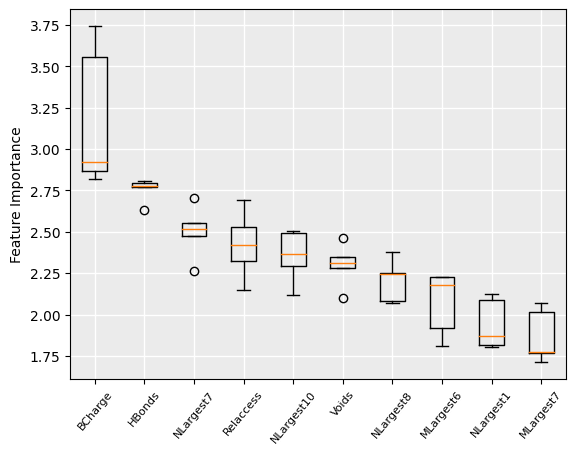

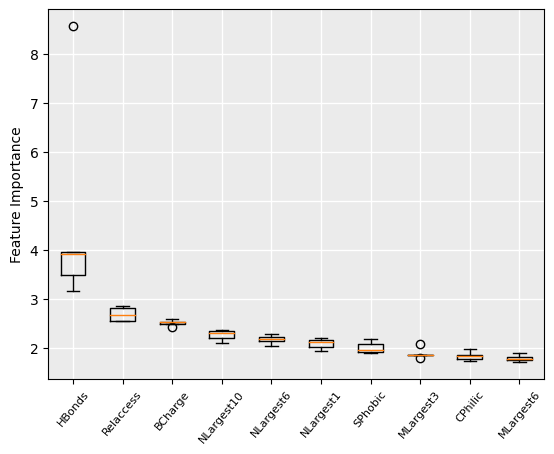

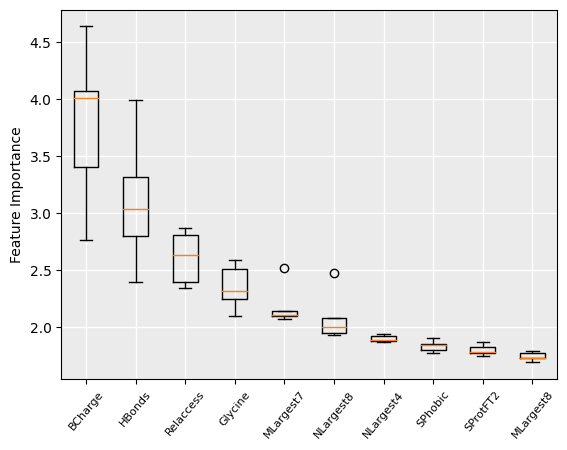

In [3]:
for i in range(1,6):
    x = i    
    all_models = []
    for file in range(1,6):
        file_name = f"CV_{x}_model_{file}.pkl"
        with open(file_name, "rb") as f:
            model = pickle.load(f)
            all_models.append(model)
            
    feature_importance = []
    for i in range(len(all_models)): 
        score = all_models[i].get_score(importance_type = 'gain')
        importance = sorted(score.items(), key=lambda x: x[1], reverse=True)[:10]
        features = dict(importance)
        feature_importance.append(features)
        
    scores = [[item[key] for key in item] for item in feature_importance]

    # Feature names
    features = list(feature_importance[0].keys())

    # Create Pandas DataFrame
    df = pd.DataFrame(scores, columns=features)
    
    # Plot box plot using Matplotlib

    fig, ax = plt.subplots()

    plt.grid(visible=True, which = 'major', color='#bdbdbd', linewidth=0.4)
    ax.grid(which='major', color='white', linewidth=1)
    ax.set_axisbelow(True)

    ax.boxplot(df.values)
    ax.set_xticklabels(df.columns, rotation = 50, size = 8)
    plt.ylabel("Feature Importance")
    ax.set_facecolor('#EBEBEB')


    plt.show()


In [4]:
# fig, ax = plt.subplots()
# cmap = plt.cm.get_cmap('tab10')

# # Loop through each fold
# for i, features in enumerate(feature_importance):
#     # Get the color for this fold
#     color = cmap(i)

#     # Plot the feature importance scores for this fold
#     ax.barh(range(len(features)), list(features.values()), align='center', color=color, alpha=0.5)
#     ax.set_yticks(range(len(features)))
#     ax.set_yticklabels(list(features.keys()))

#     # Add a title and axis labels
#     ax.set_title('Top %d Features - Fold %d' % (10, i+1))
#     ax.set_xlabel('Feature Importance')
#     ax.set_ylabel('Feature')

#     # Add horizontal grid lines
#     ax.xaxis.grid(True)

#     # Invert the y-axis to show the most important features at the top
#     ax.invert_yaxis()

# # Show the plot
# plt.show()